# PRCP- 1001- RiceLeaf disease detection

### 1. PROBLEM STATEMENT
This dataset contains 120 jpg images of disease-infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in each class.
####   CLASSES:
1. Leaf smut
2. Brown spot
3. Bacterial leaf blight

We have to create a model which can classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot and also to analyze various techniques like Data Augmentation, etc and create a report on that.


### 2. IMPORTING LIBRARIES

In [86]:
# Importing numpy
import numpy as np

# Importing matplotlib.pyplot
import matplotlib.pyplot as plt

# Importing pathlib
import pathlib

# Importing image_dataset_from_directory from keras
from tensorflow.keras.utils import image_dataset_from_directory

# Importing Sequential from keras
from tensorflow.keras import Sequential

# Importing Rescaling, Conv2D, MaxPooling2D, Flatten, Dense from keras
from tensorflow.keras.layers import InputLayer,Rescaling,Conv2D,MaxPooling2D,Flatten,Dense,Dropout,RandomFlip, RandomRotation, RandomZoom

# Importing SparseCategoricalCrossentropy from keras
from tensorflow.keras.losses import SparseCategoricalCrossentropy

### 3. LOADING DATA

In [87]:
# Assigning batch size, image height, image width,Epochs,chennals
BATCH_SIZE=8
CHANNELS=3
EPOCHS=50

In [88]:
# Assigning directory string to an object
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Data",
    shuffle=True,
     batch_size=BATCH_SIZE
)

Found 119 files belonging to 3 classes.


### 4. VISULAZING DATA

In [89]:
# Class names for the data
class_names=dataset.class_names
class_names

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

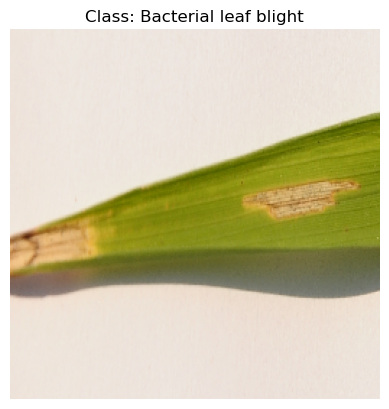

Image shape: (256, 256, 3)


In [90]:
#Visualizing the image from the dataset to check image size
# Get a batch from the dataset
 
image_batch, label_batch = next(iter(dataset))

# Pick the first image in the batch
image = image_batch[0]
label = label_batch[0]

# Show the image
plt.imshow(image.numpy().astype("uint8"))
plt.title(f"Class: {class_names[label.numpy()]}")
plt.axis("off")
plt.show()

# Print the shape of the image
print("Image shape:", image.shape)


Image 1 shape: (256, 256, 3) | Class: Bacterial leaf blight


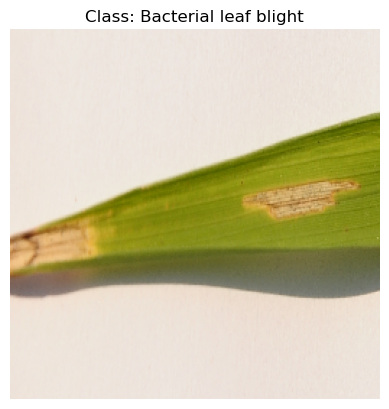

Image 2 shape: (256, 256, 3) | Class: Leaf smut


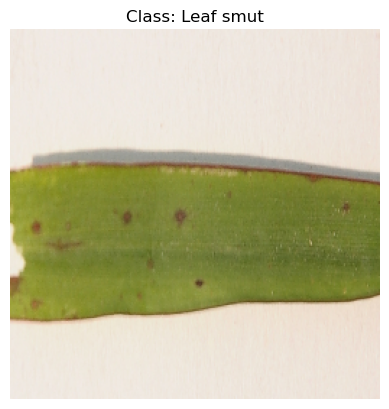

Image 3 shape: (256, 256, 3) | Class: Brown spot


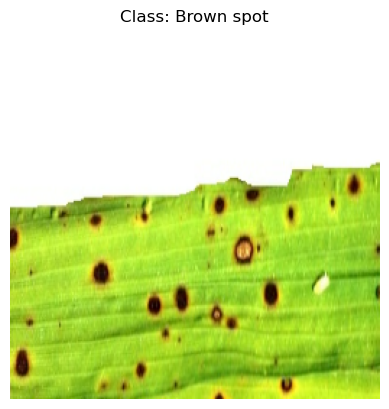

Image 4 shape: (256, 256, 3) | Class: Bacterial leaf blight


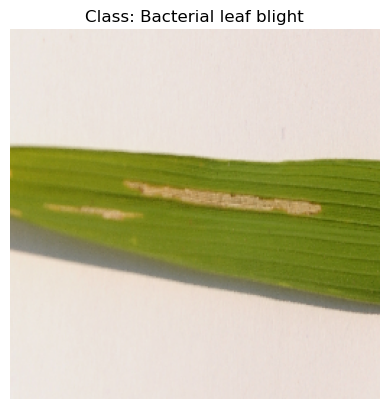

Image 5 shape: (256, 256, 3) | Class: Brown spot


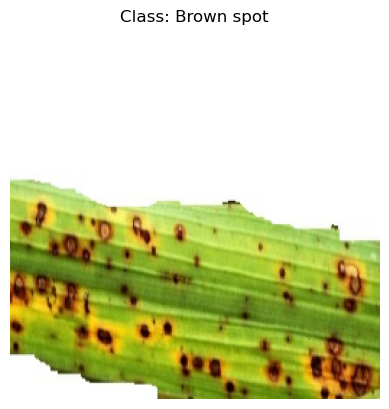

Image 6 shape: (256, 256, 3) | Class: Leaf smut


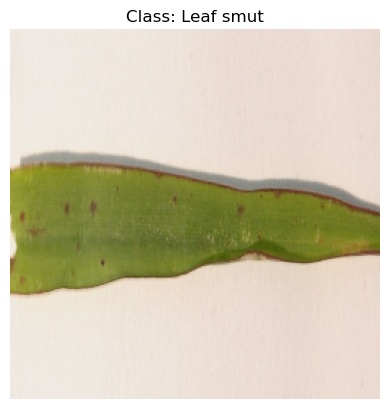

Image 7 shape: (256, 256, 3) | Class: Leaf smut


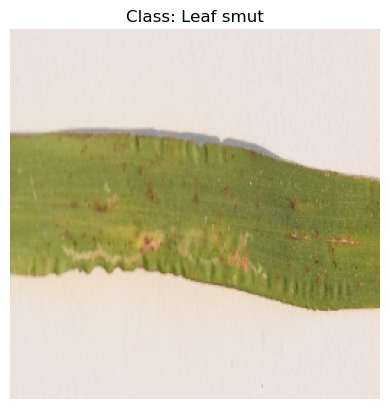

Image 8 shape: (256, 256, 3) | Class: Bacterial leaf blight


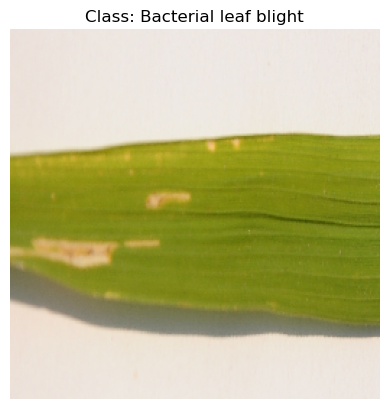

In [91]:
# Visualizing the images in training data by matplotlib.pyplot
batch_size = image_batch.shape[0]  # Number of images in the batch

for i in range(batch_size):
    image = image_batch[i].numpy().astype('uint8')
    label = label_batch[i].numpy()

    # Print image shape and class name
    print(f"Image {i+1} shape: {image.shape} | Class: {class_names[label]}")

    # Show the image
    plt.figure()
    plt.imshow(image)
    plt.title(f"Class: {class_names[label]}")
    plt.axis('off')
    plt.show()


In [92]:
# Assuming 'dataset' is your tf.data.Dataset object loaded using image_dataset_from_directory
# Function to check if all images have the same shape
def check_image_size(dataset):
    # Get the first batch
    for image_batch, label_batch in dataset.take(1):
        # Get the shape of the first image in the batch
        image_shape = image_batch[0].shape
        print(f"Expected image shape: {image_shape}")

        # Check all images in the dataset for consistency
        for i, image in enumerate(image_batch):
            if image.shape != image_shape:
                print(f"Image {i+1} has a different shape: {image.shape}")
                return False
        
    # If all images have the same shape
    print("All images have the same shape.")
    return True

# Run the function to check the image sizes
check_image_size(dataset)


Expected image shape: (256, 256, 3)
All images have the same shape.


True

Insight:
    
1.All images in the dataset have same pixel size

### 5.Data splitting

In [93]:
#Splitting dataset into Train_da & test_ds & val_ds
def get_dataset_partitions_tf(ds, train_split=0.70, val_split=0.1, test_split=0.2, shuffle=True, shuffle_size=10000):
   
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [94]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [95]:
#checking the len of the Train_ds
len(train_ds)

10

In [96]:
#Checking the len of the val_ds
len(val_ds)

1

In [97]:
#Checking the len of the test_ds
len(test_ds)

4

###  6.Model training 

In [98]:
model=Sequential()# Initializing Sequential model from keras

# Ading InputLayer to the model
model.add(InputLayer(shape=(256,256,3)))

# Adding Rescaling layer to the model for scaling the image array
model.add(Rescaling(1./255))

# Adding convolution layer to the model
model.add(Conv2D(32,3,activation='relu'))

# Adding pooling layer to the model
model.add(MaxPooling2D())

# Adding convolution layer to the model
model.add(Conv2D(32,3,activation='relu'))

# Adding pooling layer to the model
model.add(MaxPooling2D())

# Adding convolution layer to the model
model.add(Conv2D(32,3,activation='relu'))

# Adding pooling layer to the model
model.add(MaxPooling2D())

# Adding Flatten layer to the model
model.add(Flatten())

# Adding Dense layer to the model
model.add(Dense(128,activation='relu'))

# Adding the output layer to the model
model.add(Dense(3))

In [99]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,686,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,706,307 (14.14 MB)

 Trainable params: 3,706,307 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

In [100]:
# Compiling the model
model.compile(
    optimizer='adam',  # Set your desired learning rate here
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [101]:
#fitting the model to training data
history=model.fit(train_ds,
         epochs=EPOCHS,
         batch_size=BATCH_SIZE,
         verbose=1,
         validation_data=val_ds)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 639ms/step - accuracy: 0.4084 - loss: 2.3287 - val_accuracy: 0.3750 - val_loss: 1.0986
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 977ms/step - accuracy: 0.3418 - loss: 1.0986 - val_accuracy: 0.3750 - val_loss: 1.0986
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 852ms/step - accuracy: 0.4123 - loss: 1.0986 - val_accuracy: 0.2500 - val_loss: 1.0986
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 500ms/step - accuracy: 0.3660 - loss: 1.0986 - val_accuracy: 0.2500 - val_loss: 1.0986
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 472ms/step - accuracy: 0.3684 - loss: 1.0986 - val_accuracy: 0.0000e+00 - val_loss: 1.0986
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 431ms/step - accuracy: 0.2571 - loss: 1.0986 - val_accuracy: 0.3750 - val_loss: 1.0986
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 416ms/step - accuracy: 0.2765 - loss: 1.0986 - val_accuracy: 0.1250 - val_loss: 1.0986
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 398ms/step - accuracy: 0.2879 - loss: 1.0986 - val_accura

In [105]:
#model evalution
model_scores=model.evaluate(test_ds)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.2958 - loss: 1.0986


In [107]:
# Accuracy score of the model
accuracy=model.evaluate(test_ds)[1]
print('The accuracy for test data is : ',accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 190ms/step - accuracy: 0.3667 - loss: 1.0986
The accuracy for test data is :  0.375


In [108]:
# Predicting the model by test data
prediction=model.predict(test_ds)
prediction

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step


array([[-40.348225 , -16.563059 ,  -4.534423 ],
       [-42.290634 , -16.965929 ,  -4.5859723],
       [-44.73482  , -18.343128 ,  -5.1212983],
       [-25.408222 , -10.649072 ,  -2.9256241],
       [-38.88653  , -15.794562 ,  -4.3338194],
       [-36.447834 , -14.643982 ,  -3.9697223],
       [-39.905792 , -16.64712  ,  -4.6825852],
       [-42.098854 , -17.059086 ,  -4.6494203],
       [-28.828732 , -11.335974 ,  -3.058407 ],
       [-39.166874 , -15.425009 ,  -4.1008863],
       [-37.570343 , -15.335993 ,  -4.2528358],
       [-30.381796 , -12.249935 ,  -3.3471344],
       [-37.500134 , -14.973554 ,  -4.0421047],
       [-40.291405 , -16.323973 ,  -4.411023 ],
       [-43.80512  , -17.23053  ,  -4.5760374],
       [-40.26512  , -16.253332 ,  -4.382219 ],
       [-38.679268 , -14.968171 ,  -3.9193673],
       [-41.30434  , -16.889235 ,  -4.6403604],
       [-41.68568  , -16.851076 ,  -4.5713696],
       [-39.684277 , -15.718731 ,  -4.175379 ],
       [-29.174568 , -11.423498 ,  -3.13

In [109]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 10}

In [110]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [111]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

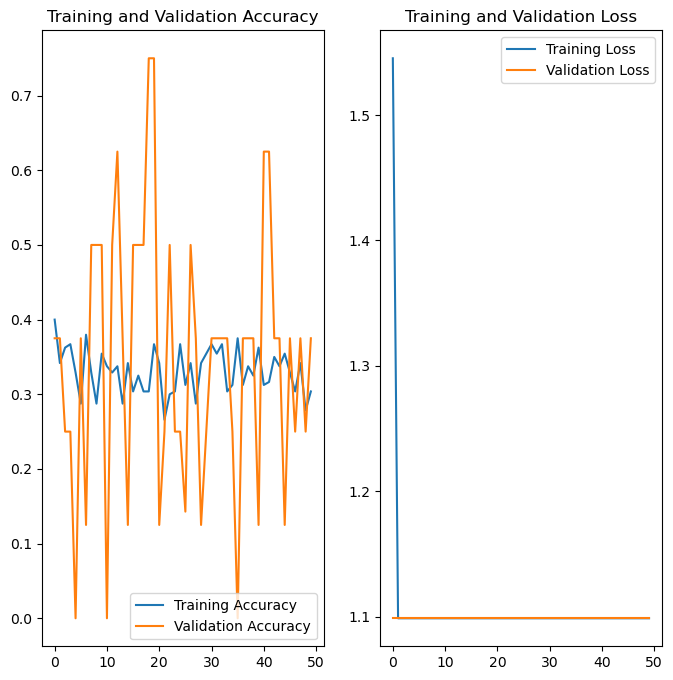

In [112]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 167ms/step


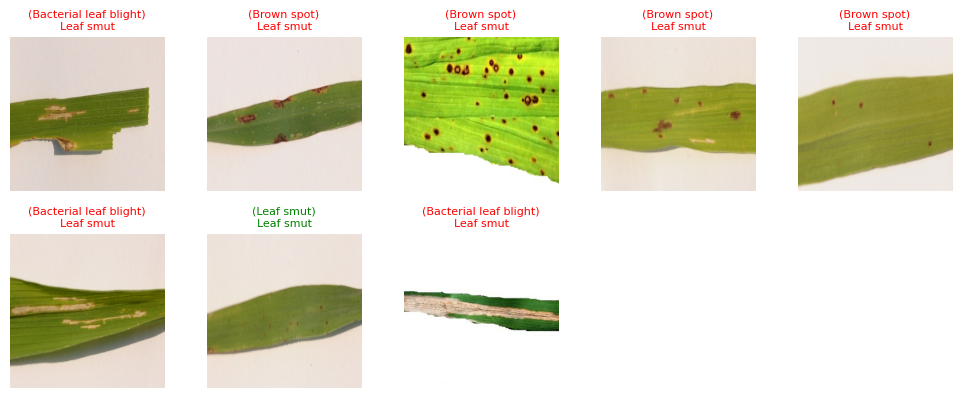

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `model` is already trained, and `test_ds` is your test dataset
predictions = model.predict(test_ds)  # Get the model predictions for the test dataset

plt.figure(figsize=(10, 10))

# Loop through a batch from the test dataset
for images, labels in test_ds.take(1):
    for i in range(min(23, images.shape[0])):  # Ensure not to exceed the batch size
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

        # Compare true label with predicted label and color accordingly
        predicted_class = np.argmax(predictions[i])
        true_class = labels[i].numpy()

        plt.title(
            f"({class_names[true_class]})\n{class_names[predicted_class]}",
            color="green" if true_class == predicted_class else "red",
            fontsize=8
        )

plt.tight_layout()
plt.show()


### 7. DATA AUGMENTATION

In [114]:
#Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [115]:
#Applying Data Augmentation to Train Dataset
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [116]:
# data_augmentation summary
data_augmentation.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_flip_1 (RandomFlip)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_1 (RandomRotation)   │ (None, 256, 256, 3)         │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

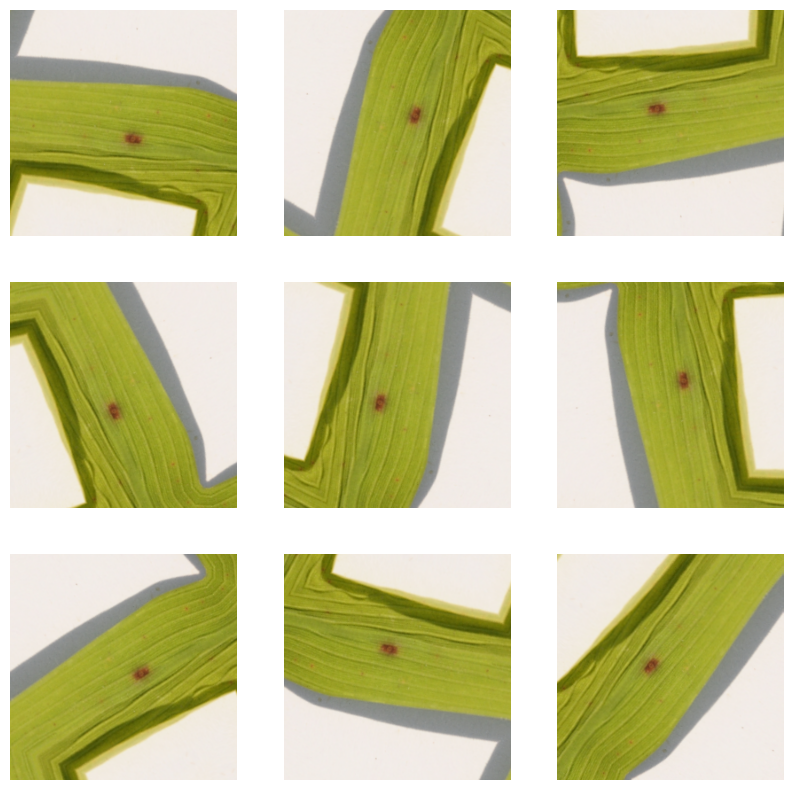

In [117]:
# Visualizing the images in training data after data augmentation
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [118]:
# Initialing Sequential model
model_data_aug=Sequential()

# Adding InputLayer to the model_data_aug
model_data_aug.add(InputLayer(shape=(256,256,3)))

# Adding Rescaling layer to the model_data_aug for scaling the images array
model_data_aug.add(Rescaling(1./255))

# Adding data_augmentation
model_data_aug.add(data_augmentation)

# Adding convolution layer to the model_data_aug
model_data_aug.add(Conv2D(32,3,activation='relu'))

# Adding pooling layer to the model_data_aug
model_data_aug.add(MaxPooling2D())

# Adding convolution layer to the model_data_aug
model_data_aug.add(Conv2D(32,3,activation='relu'))

# Adding pooling layer to the model_data_aug
model_data_aug.add(MaxPooling2D())

# Adding convolution layer to the model_data_aug
model_data_aug.add(Conv2D(32,3,activation='relu'))

# Adding pooling layer to the model_data_aug
model_data_aug.add(MaxPooling2D())

# Adding Flatten layer to the model_data_aug
model_data_aug.add(Flatten())

# Adding Dense layer to the model_data_aug
model_data_aug.add(Dense(128,activation='relu'))

# Adding output layer to the model_data_aug
model_data_aug.add(Dense(3))

In [119]:
model_data_aug.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_6 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       3,686,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,706,307 (14.14 MB)

 Trainable params: 3,706,307 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

In [120]:
#compiling the data to model
model_data_aug.compile(optimizer='adam',loss=SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [121]:
# Fiiting the training data to the model_data_aug
model_data_aug.fit(train_ds,validation_data=test_ds,
          epochs=50)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.2775 - loss: 1.6256 - val_accuracy: 0.4516 - val_loss: 1.0843
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 431ms/step - accuracy: 0.3762 - loss: 1.0899 - val_accuracy: 0.3438 - val_loss: 1.0513
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 490ms/step - accuracy: 0.3255 - loss: 1.0884 - val_accuracy: 0.6452 - val_loss: 1.0399
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 440ms/step - accuracy: 0.3819 - loss: 1.0685 - val_accuracy: 0.6562 - val_loss: 1.0713
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 498ms/step - accuracy: 0.3521 - loss: 1.1033 - val_accuracy: 0.2812 - val_loss: 1.1328
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 471ms/step - accuracy: 0.3944 - loss: 1.1652 - val_accuracy: 0.4375 - val_loss: 1.0687
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 600ms/step - accuracy: 0.3884 - loss: 1.0661 - val_accuracy: 0.3750 - val_loss: 1.0988
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 572ms/step - accuracy: 0.3856 - loss: 1.0977 - val_accuracy: 0.50

In [123]:
# Accuracy score of the model_data_aug
accuracy_data_aug=model_data_aug.evaluate(test_ds)[1]
print('The accuracy for test data is : ',accuracy_data_aug)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.7042 - loss: 0.5959
The accuracy for test data is :  0.71875


In [124]:
# Predicting the model_data_aug by test data
prediction=model_data_aug.predict(test_ds)
prediction

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step


array([[ 4.4697809e+00, -3.1911333e+00, -1.3352331e+00],
       [ 4.3174586e+00, -2.8449142e+00, -2.5732934e+00],
       [ 2.2930808e-01,  2.1483133e+00, -2.0311816e+00],
       [ 2.8946660e+00,  8.2470560e-01, -3.4928145e+00],
       [ 4.9229689e+00, -1.8668230e+00, -3.0721221e+00],
       [-6.0629112e-01,  3.0523664e-01,  1.0689647e+00],
       [ 1.1067363e+00, -1.3477316e+00,  3.7354952e-01],
       [ 1.7161751e+00, -1.2214104e+00,  6.5095708e-02],
       [-2.0311008e-01, -7.8305721e-02,  8.8521671e-01],
       [-1.2093710e+00,  4.2284584e+00, -6.0843229e-01],
       [ 2.8664863e+00,  1.2157698e+00, -3.6180379e+00],
       [ 1.4484147e+00, -9.7008991e+00,  1.4066049e+01],
       [-1.4060832e+00,  1.1486479e+00,  1.8350832e+00],
       [ 1.8780718e+00, -5.6851780e-01, -1.7087278e+00],
       [-6.7101009e-03, -8.1208915e-01,  1.2982374e+00],
       [-2.7655143e-01, -4.5782425e-02,  7.4910665e-01],
       [-5.9212738e-01,  4.4526333e-01,  8.2821596e-01],
       [-9.1191107e-01,  6.9231

4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 201ms/step


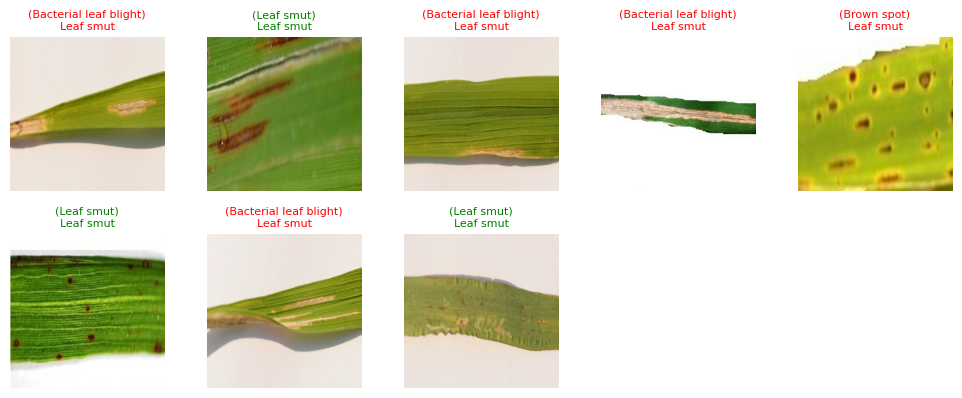

In [127]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `model` is already trained, and `test_ds` is your test dataset
# Generate predictions for the images in the test dataset
predictions = model.predict(test_ds)

plt.figure(figsize=(10, 10))

# Loop through a batch from the test dataset
for images, labels in test_ds.take(1):
    for i in range(min(23, images.shape[0])):  # Ensure not to exceed the batch size
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

        # Get the predicted class and true class
        predicted_class = np.argmax(predictions[i])  # Predicted class
        true_class = labels[i].numpy()  # True class label

        # Set the title with the true and predicted class names, color coded for correctness
        plt.title(
            f"({class_names[true_class]})\n{class_names[predicted_class]}",
            color="green" if true_class == predicted_class else "red",
            fontsize=8
        )

plt.tight_layout()
plt.show()


### 7. REPORT

In [129]:
print('The accuracy of the CNN model without data aumentation is ', accuracy)
print('The accuracy of the CNN model with data augmentation is ', accuracy_data_aug)

The accuracy of the CNN model without data aumentation is  0.375
The accuracy of the CNN model with data augmentation is  0.71875


1. The dataset consists of images categorized into three distinct classes.  
2. We split the dataset into training and testing sets, using 80% of the images for training and 20% for testing.  
3. A **Sequential** model was built using Keras and trained on the training data.  
4. To further improve the model's performance, **data augmentation** techniques were applied.

As a result, the **CNN model with data augmentation** achieved higher accuracy compared to the model trained without augmentation, demonstrating that data augmentation effectively enhances model performance.


# CHALLENGES FACED

1.limited dataset

2.Complexity of the model

3.Hardware limitations


# Project Details:
Project Team ID:
PTID-CDS-JAN-25-2367

Project ID:
PRCP-1001-RICE LEAF DISEASE SETECTION

Team Members:
1.RAJESH KANNAN - rajeshkannanemailpdkt@gmail.com

2.THIRUMALAI  -thiru292004@gmail.com

3.SABARISHAN  -sabarishan342002@gmail.com

4.VIMAL RAJ J - mrvimalofficiall@gmail.com